## Lighthouse Labs - Synaptive Medical

### W4D4 Model Evaluation

Instructor: Socorro Dominguez  
December 11, 2020


## Agenda
1. Train / test split
    - Train / validation / test
    - Cross-validation
* Model metrics
    - Classification
    - Regression
* Hyperparameter tuning
    - Grid Search

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

## Train / test split
- We talked about the golden rule and why we need to do a train / test split last week
- Let's dive a bit more into this conversation


### Review - True or False:
1. In supervised learning, the training error is usually lower than the validation error.
2. More "complicated" models are more likely to overfit than "simple" ones.
3. If our training error is extremely low, that means we're overfitting.

F, T, F

## First wrinkle: train / validation / test

### We've been talking about 2 sets, but there are often 3:
   - Training: used to learn the model
   - Validation: used to optimize the model (e.g., hyperparameters)
   - Testing: used to test the model (lock it in a "vault" until you're ready to test)
  
    
### Typically we split the data twice:
   1. Train / test split: results in the "data we use" and the "data we lock away"
   2. Split the training set again into training and validation
    
**We do this so that we can use some "lightly used" unseen data to optimize our model.**


## Second wrinkle: cross-validation

### Drawbacks of a single train / validation split
- Only using a portion of your data for training/validating
- If your dataset is small you might end up with a tiny training/validation set
- Might be unlucky with your splits such that they don't well represent your data (sampling bias)

### Solution: cross-validation
- Doing multiple train / validation splits

## Cross-validation, continued...

<img src='imgs/cv.png' width="800">

## A quick example

In [2]:
# reading in my train set (test set stored away)
df = pd.read_csv('data/cities_USA.csv', index_col=0)
X = df.drop(columns=['vote'])
y = df[['vote']]

df.head()

,lon,lat,vote
1,-80.162475,25.692104,blue
2,-80.214360,25.944083,blue
3,-80.094133,26.234314,blue
4,-80.248086,26.291902,blue
5,-81.789963,26.348035,blue


In [3]:
# using a sample model (will dive into details on Wednesday)
model = DecisionTreeClassifier(max_depth=1)

## Using sklearn cross-validation

In [4]:
from sklearn.model_selection import cross_val_score

In [5]:
cv_score = cross_val_score(model, X, y, cv=5)
cv_score

array([0.425 , 0.4125, 0.775 , 0.5875, 0.575 ])

In [6]:
print(f"Average cross-validation score = {np.mean(cv_score):.2f}")

Average cross-validation score = 0.55


## Next topic: model metrics

Regression and classification problems use different metrics to evaluate model effectiveness. 

- **Classification:** Accuracy, recall, precision, confusion matrix etc. 
- **Regression:** R^2, Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Eror (MAE)

This should make intuitive sense - you can't really have "accuracy" for a continuous number (regression). But you can be "more right" or "more wrong" - predicting close or far away from the true value.

## Classification metrics

- **Accuracy**: No. of times you're right / No. of samples
- Confusion Matrix: Gives you more detail, including how your model fails

| | Actual + | Actual - |
|-|-|-|
|Predicted + | True Positive | False Positive | 
|Predicted - | False Negative | True Negative |

- In a case of 100 examples (50 +ve, 50 -ve), 95% accuracy:

| | Actual + | Actual - |
|-|-|-|
|Predicted + | 50| 5 | 
|Predicted - |0 | 45|

| | Actual + | Actual - |
|-|-|-|
|Predicted + | 45| 0 | 
|Predicted - |5 | 50|

## Classification metrics - thought experiment
- Which model would you rather have predicting...
    - **cancer diagnosis**? (positive means "has cancer")
    - **spam filtering**? (positive means "is spam")
    
    
|Model 1: False Positive | Actual + | Actual - |
|-|-|-|
|Predicted + | 50| 5 | 
|Predicted - |0 | 45|

|Model 2: False Negative | Actual + | Actual - |
|-|-|-|
|Predicted + | 45| 0 | 
|Predicted - |5 | 50|

**Conclusion: How your model fails matters**

## Classification metrics - cheat sheet
<img src='imgs/confusion_matrix.png'>

## Using the terms

### Recall: True positives / Condition positive
- We want high recall when we don't want to miss any positive conditions
- E.g., cancer detection, detecting harmful tailings dams

### False negative rate: False negative / Condition positive
- Probability that we miss a true condition
- Bad if we're doing cancer diagnosis, not so bad when we're doing spam filtering

### Precision: True positives / Detected or predicted positives
- We want high precision if the machine learning model is going to trigger some automated process
- Low precision may be OK in cancer diagnosis, just run another test


## Getting reports from sklearn - pull up our data

In [7]:
df.head()

,lon,lat,vote
1,-80.162475,25.692104,blue
2,-80.214360,25.944083,blue
3,-80.094133,26.234314,blue
4,-80.248086,26.291902,blue
5,-81.789963,26.348035,blue


In [8]:
# Doing a train / validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

## Fit a model and predict on validation set

In [9]:
model = DecisionTreeClassifier(max_depth=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [10]:
model.predict(X_val)

array(['red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red',
       'red', 'red', 'red', 'blue', 'red', 'red', 'blue', 'red', 'red',
       'red', 'red', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'red',
       'red', 'red', 'blue', 'red', 'red', 'red', 'red', 'red', 'blue',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'blue', 'blue', 'red', 'blue', 'red', 'red', 'red',
       'red', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'red',
       'red', 'blue', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue',
       'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'red', 'blue',
       'blue', 'red', 'blue', 'red', 'red', 'red', 'blue', 'red', 'blue',
       'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue',
       'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue',
       'red', 'blue', 'blue', 'red', 'red', 'red', 'red', 'blue', 'red',
       'red', 'red', 'red'], dtype=object)

## Confusion matrix

In [11]:
from sklearn.metrics import plot_confusion_matrix

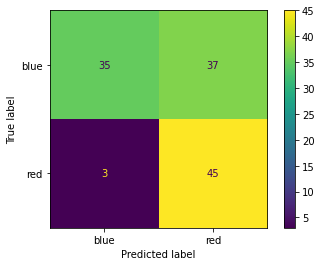

In [12]:
plot_confusion_matrix(model, X_val, y_val);

## Classification report

In [13]:
from sklearn.metrics import classification_report

In [14]:
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

        blue       0.92      0.49      0.64        72
         red       0.55      0.94      0.69        48

    accuracy                           0.67       120
   macro avg       0.73      0.71      0.66       120
weighted avg       0.77      0.67      0.66       120



## Regression metrics

| Metric | Definition | Notes | Formula |
|:-|:-|:----| :----- |
| Mean Squared Error | Sum of **squared** errors divided by number of samples | Commonly used. Outliers have a big impact |$\displaystyle\frac{1}{n}\sum_{t=1}^{n}e_t^2$ |
| Root Mean Squared Error | Root of the MSE method | Same downsides, but more interpretable |  $\displaystyle\sqrt{\frac{1}{n}{\sum_{t=1}^{n}e_t^2}}$ |
| Mean Absolute Error | Sum of  **absolute** errors divided by number of samples | Outlier errors have less of an impact | $\displaystyle\frac{1}{n}\sum_{t=1}^{n}|e_t|$ |



**R^2 and Adjusted R^2**
- **R-squared** measures the proportion of the variation in your dependent variable (Y) explained by your independent variables (X)

    - **R^2** < 0.3 ; None or Very weak effect
    - 0.3 < **R^2** < 0.5 ; Weak or Low Effect
    - 0.5 < **R^2** < 0.7 ; Moderate Effect
    - **R^2** > 0.7 ; Strong effect
    
    
- **Adjusted R-squared** adjusts the statistic based on the number of independent variables in the model 


## Let's do an example

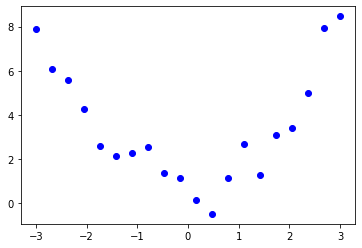

In [15]:
n = 20
X = np.linspace(-3,3,n)
y = X**2 + np.random.randn(n)

# transforming the data to include another axis
X = X[:, np.newaxis]
y = y[:, np.newaxis]
plt.scatter(X, y, color='blue');

## Let's try fitting a line

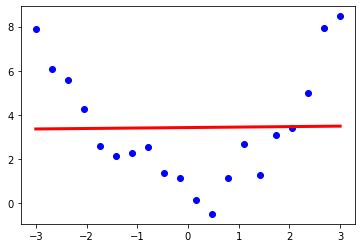

In [16]:
lr = LinearRegression()
lr.fit(X,y)
preds = lr.predict(X)

plt.scatter(X, y, color='blue')
plt.plot(X, preds, color='red', linewidth=3);

## Checking the score

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
rmse = mean_squared_error(y, preds, squared=False)
r2 = r2_score(y, preds)
print("Root mean squared error: %0.3f and r^2 score: %0.3f" % (rmse,r2))

Root mean squared error: 2.564 and r^2 score: 0.000


## Fitting a polynomial regression instead

In [19]:
deg = 2
poly_feats = PolynomialFeatures(degree=deg)
X_deg = poly_feats.fit_transform(X)
X_poly_feat_names = poly_feats.get_feature_names(['x'+ str(i) for i in range(1,deg)])
df_poly = pd.DataFrame(X_deg, columns=X_poly_feat_names)
df_poly['y'] = y
df_poly.head()

,1,x1,x1^2,y
0,1.0,-3.000000,9.000000,7.892973
1,1.0,-2.684211,7.204986,6.073534
2,1.0,-2.368421,5.609418,5.553866
3,1.0,-2.052632,4.213296,4.266080
4,1.0,-1.736842,3.016620,2.590296


## Here's what our fit looks like

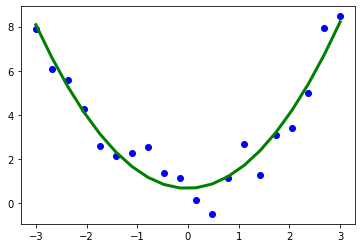

In [20]:
lr_poly = LinearRegression()
lr_poly.fit(X_deg, y)
preds = lr_poly.predict(X_deg)
plt.scatter(X, y, color='blue')
plt.plot(X, preds, color='green', linewidth=3);

## Getting the scores ... a lot better!

In [21]:
rmse = mean_squared_error(y, preds, squared=False)
r2 = r2_score(y, preds)
print("Root mean squared error: %0.3f and r^2 score: %0.3f" % (rmse,r2))

Root mean squared error: 0.716 and r^2 score: 0.922


## Final topic: hyperparameter tuning
- Each machine learning algorithm has "hyperparameters" you can adjust
- Think of them like additional knobs that you can finetune, given the algorithm
- In decision trees, for example, the depth of the tree is a hyperparameter (more on this on Weds)

### To be clear:
- **parameters** are automatically learned by the algorithm during training (e.g., weights)
- **hyperparameters** are specified based on:
    - expert knowledge
    - heuristics, or 
    - systematic/automated optimization

## Hyperparameter tuning - how?
- Trial and error
- Some common and simple techniques: grid search, random search
- Some more complicated techniques (will not cover): Bayesian hyperparameter optimization, genetic algorithms

## Seeing grid search in action

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
df = pd.read_csv('data/cities_USA.csv', index_col=0)
X = df.drop(columns=['vote'])
y = df[['vote']]

df.head()

,lon,lat,vote
1,-80.162475,25.692104,blue
2,-80.214360,25.944083,blue
3,-80.094133,26.234314,blue
4,-80.248086,26.291902,blue
5,-81.789963,26.348035,blue


## Running grid search

In [24]:
model = DecisionTreeClassifier()

In [25]:
np.arange(1, 50, 3)

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49])

In [26]:
param_grid = {
    'max_depth': np.arange(1, 50, 3)
}

In [27]:
grid_search = GridSearchCV(model, param_grid, cv=10)
grid_search.fit(X, y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49])})

## Grid search results

In [28]:
print(("Best decision tree from grid search: %.3f"
       % grid_search.score(X, y)))

Best decision tree from grid search: 1.000


In [29]:
grid_search.best_params_

{'max_depth': 10}

## Recap
1. Train / test split
    - Train / validation / test
    - Cross-validation
* Model metrics
    - Classification
    - Regression
* Hyperparameter tuning
    - Grid Search